<a href="https://colab.research.google.com/github/mgmg0429/2024-1-my-BDA/blob/main/titanic_(7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##파이썬 설치 확인

In [ ]:
import sys
import pandas as pd
import numpy as np

print(sys.version)
print(np.__version__)
print(pd.__version__)


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.25.2
2.0.3


## 코랩에서 한글 처리

In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.4 MB/s eta 0:00:00


In [ ]:
# 해상도 선명하게
%config InlineBackend.figure_format = 'retina'

##프로젝트 목표
타이타닉 호에 탑승한 승객들의 특성을 바탕으로 생존을 예측하는 모델을 개발하여, 어떤 승객이 생존할 가능성이 높은지, 어떤 요인이 생존에 영향을 미치는지 분석함.


#타이타닉 데이터를 분석해서 해결할 수 있는 문제
생존 예측 모델 구축 <br>
탑승객 프로파일 분석 <br>
탑승객 행동 패턴 및 동향 파악  <br>
타이타닉 사고 원인 및 경과 분석 <br>
타이타닉 승객에 대한 사회 경제적 특성 분석

## 데이터분석을 위한 seaborn 내장(토이) 데이터, titanic

In [ ]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Titanic 데이터프레임에 대한 요약 정보를 제공

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 타이타닉 열(변수) 설명
- survived : 0 = 사망, 1 = 생존
- pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- sex : male = 남성, female = 여성
- age : 나이
- sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
- parch : 타이타닉 호에 동승한 부모 / 자식의 수
- fare : 티켓 요금
- embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
- class : First = 1등석, Second = 2등석, Third = 3등석
- who : 남/여/아이, 'man', 'woman', 'child'
- adult_male : 남자 어른, True/False
- deck : 방 위치, 'A', 'B', 'C', 'D', 'E', 'F', 'G', NaN
- embark_town : 탑승지
- alive : 생존, yes/no
- alone : 1인 탑승, True/False

##1. 성별 (sex)

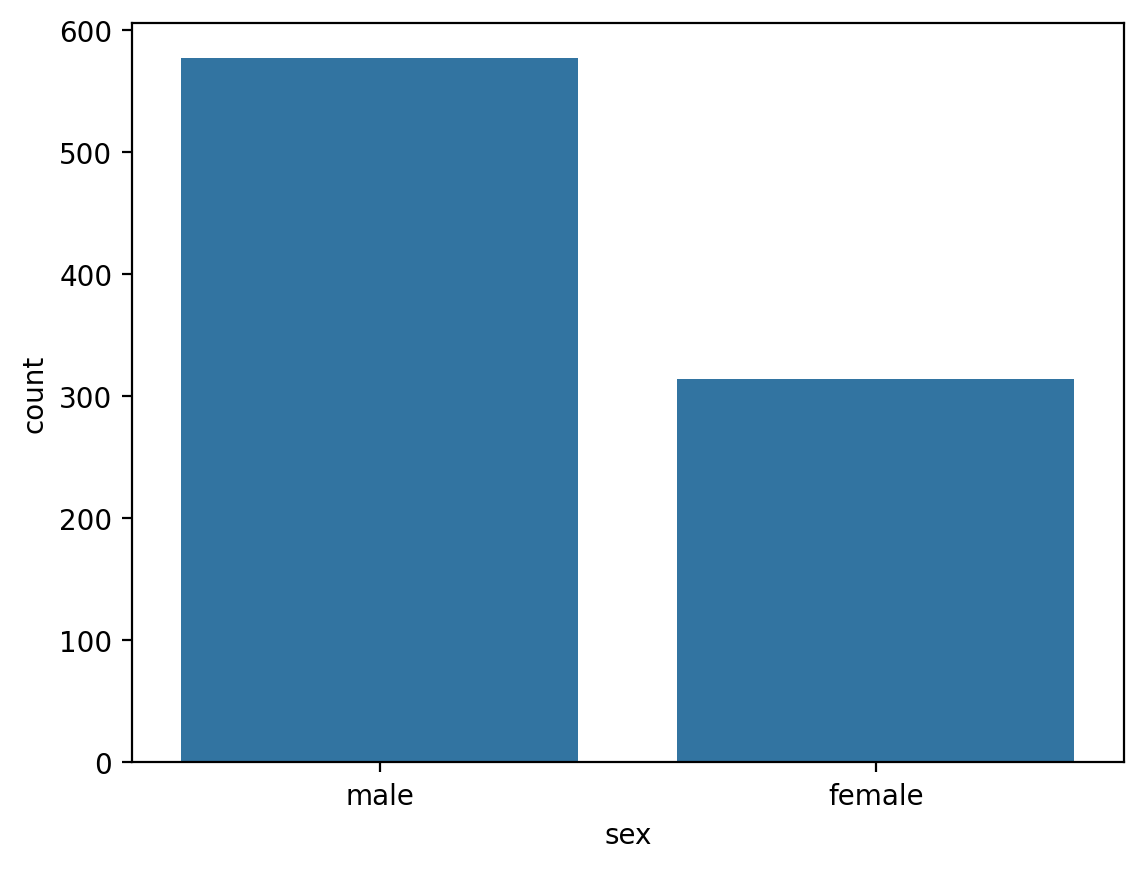

In [ ]:
# 성별에 따른 데이터의 분포 시각화
sns.countplot(titanic, x = "sex");

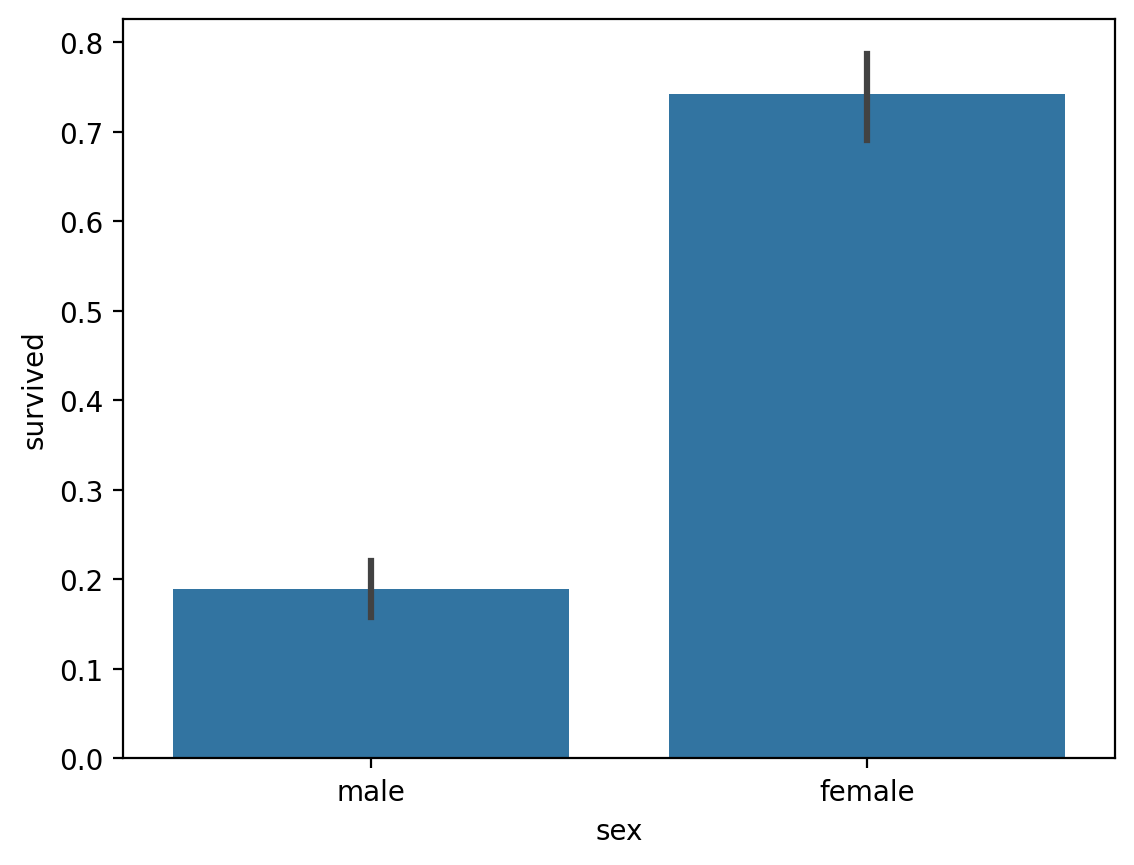

In [ ]:
# 성별에 따른 생존률 시각화
sns.barplot(x="sex", y="survived", data=titanic); # 높이: 평균

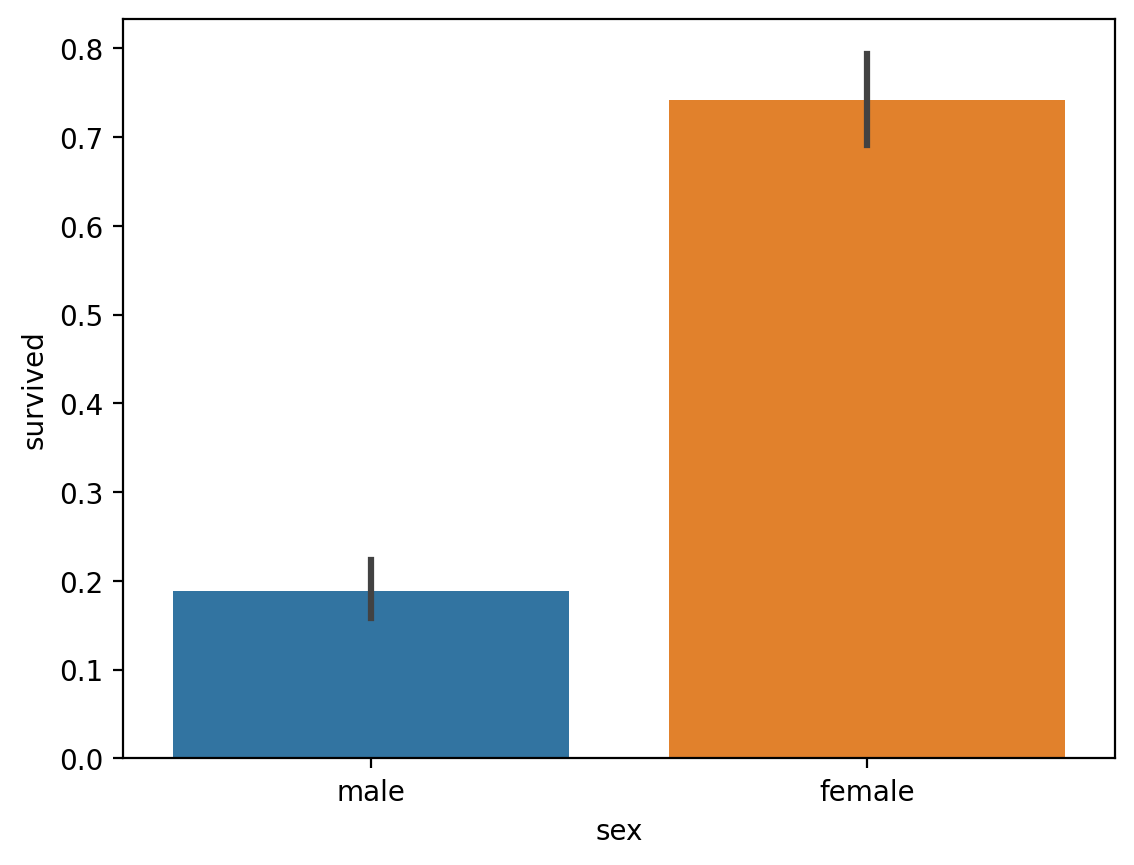

In [ ]:
# Seaborn 라이브러리를 사용하여 타이타닉 데이터셋에서 성별에 따른 생존율의 평균을 시각화
sns.barplot(titanic, x="sex", y="survived", hue="sex");

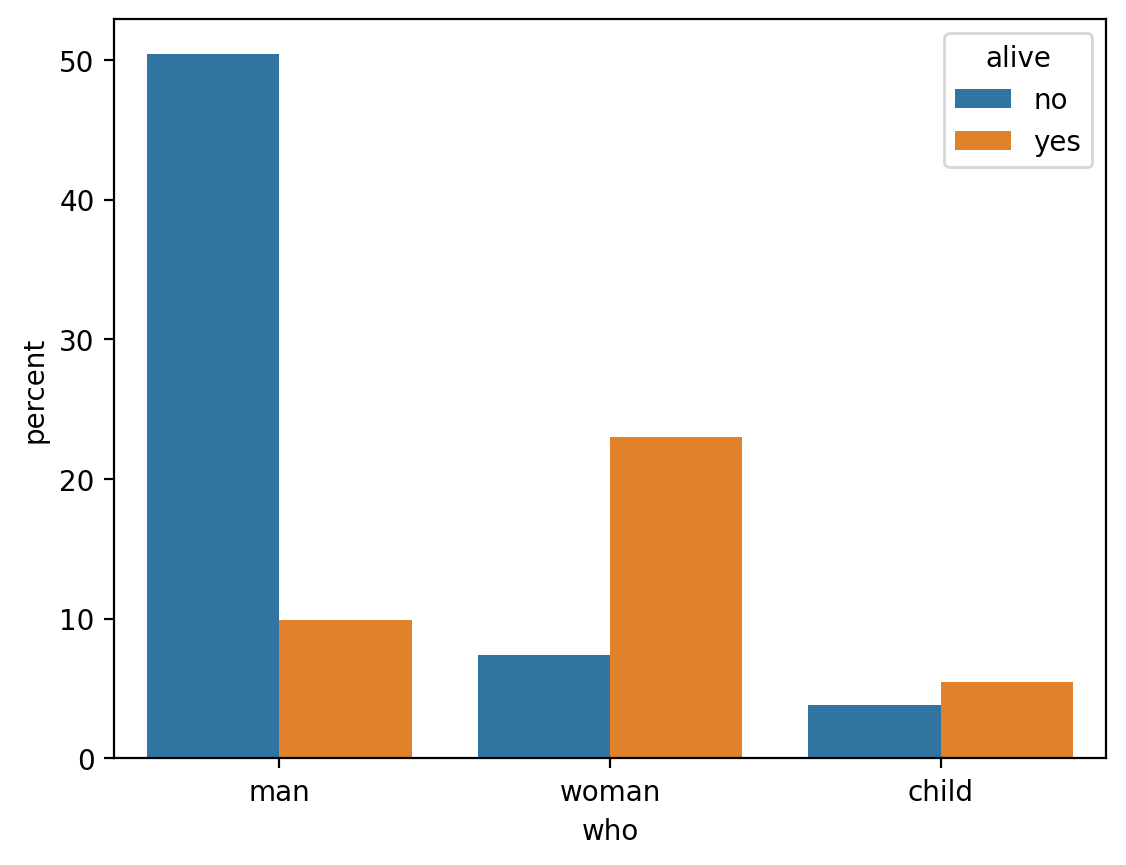

In [ ]:
#각 성별 내에서 생존자와 사망자의 비율 시각화
sns.countplot(titanic, x = "who", hue = "alive", stat = "percent");

In [ ]:
#Titanic 데이터프레임을 'sex' 열을 기준으로 그룹화하고, 각 그룹에 대해 각 열의 값의 개수를 계산
titanic.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


##2. 객실 등급 (class)

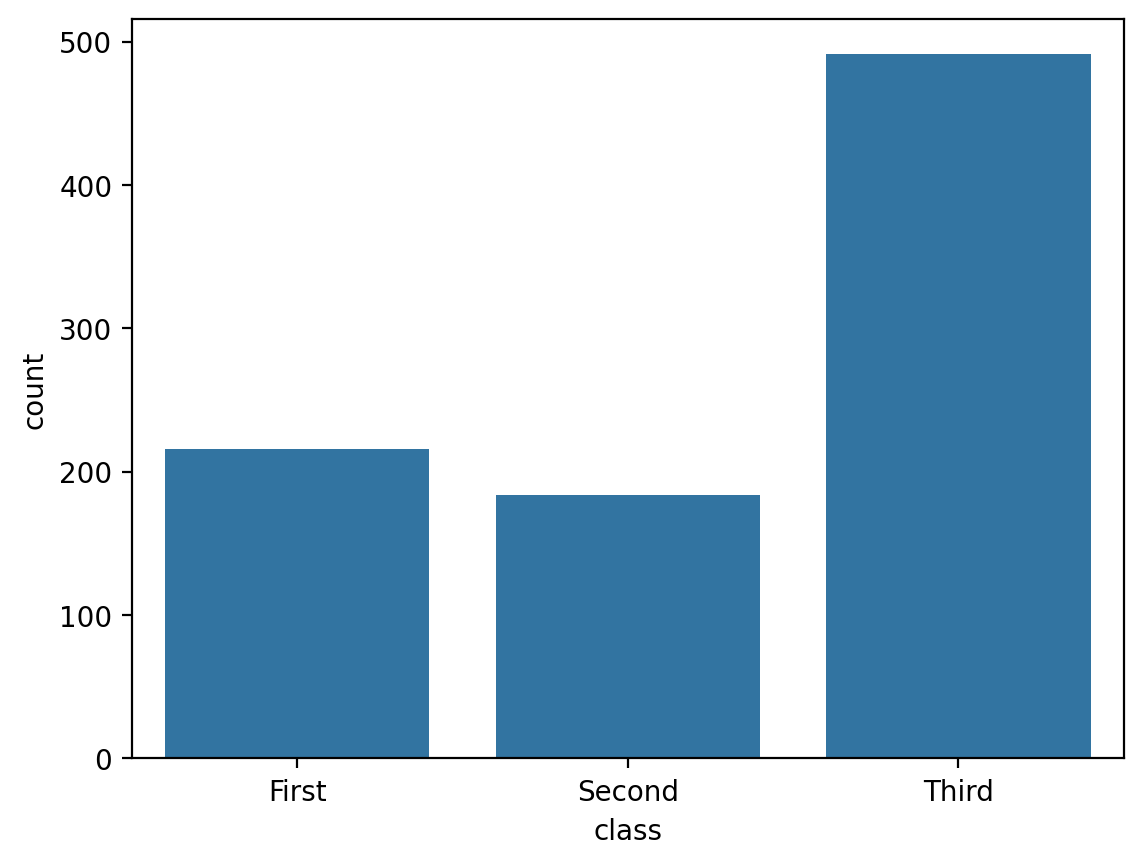

In [ ]:
# 객실 등급(class)에 따른 데이터의 분포 시각화
sns.countplot(titanic, x = 'class');

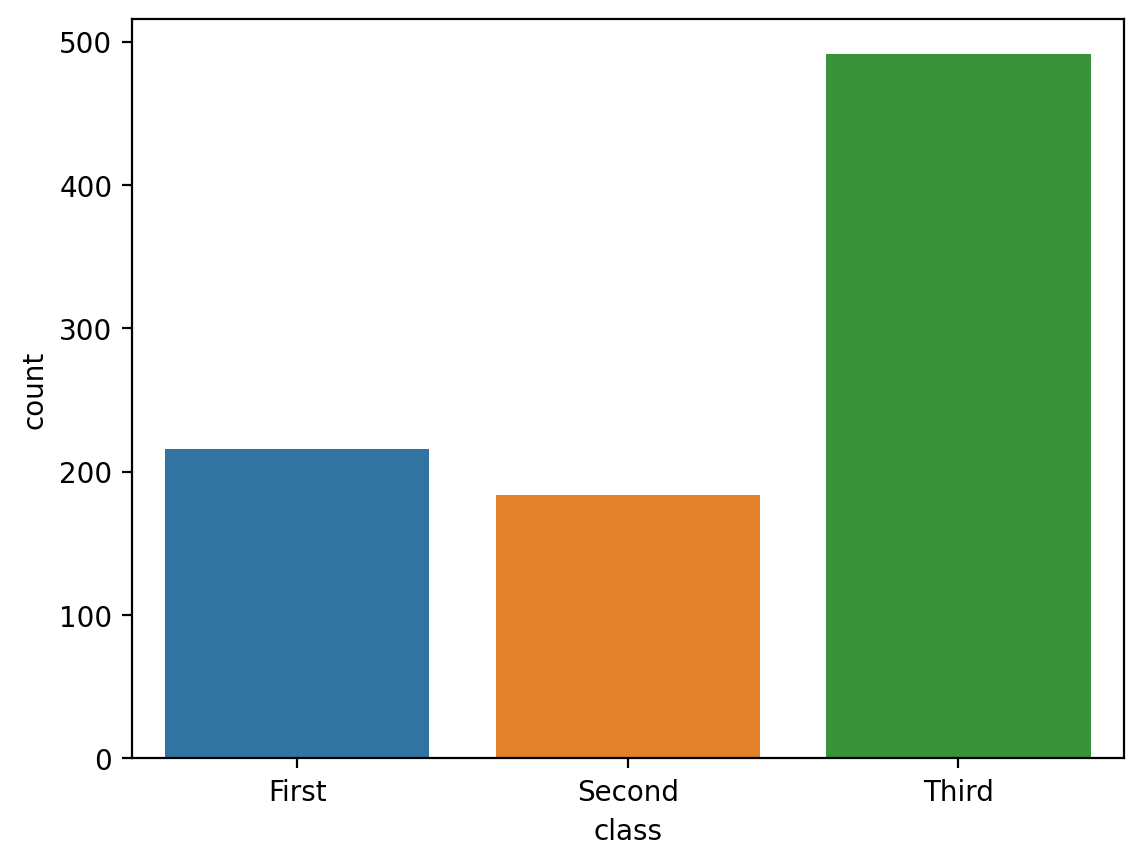

In [ ]:
# 타이타닉 데이터셋에서 class 열의 값에 따라 객실 등급별로 승객의 수 시각화
sns.countplot(titanic, x = 'class', hue='class');

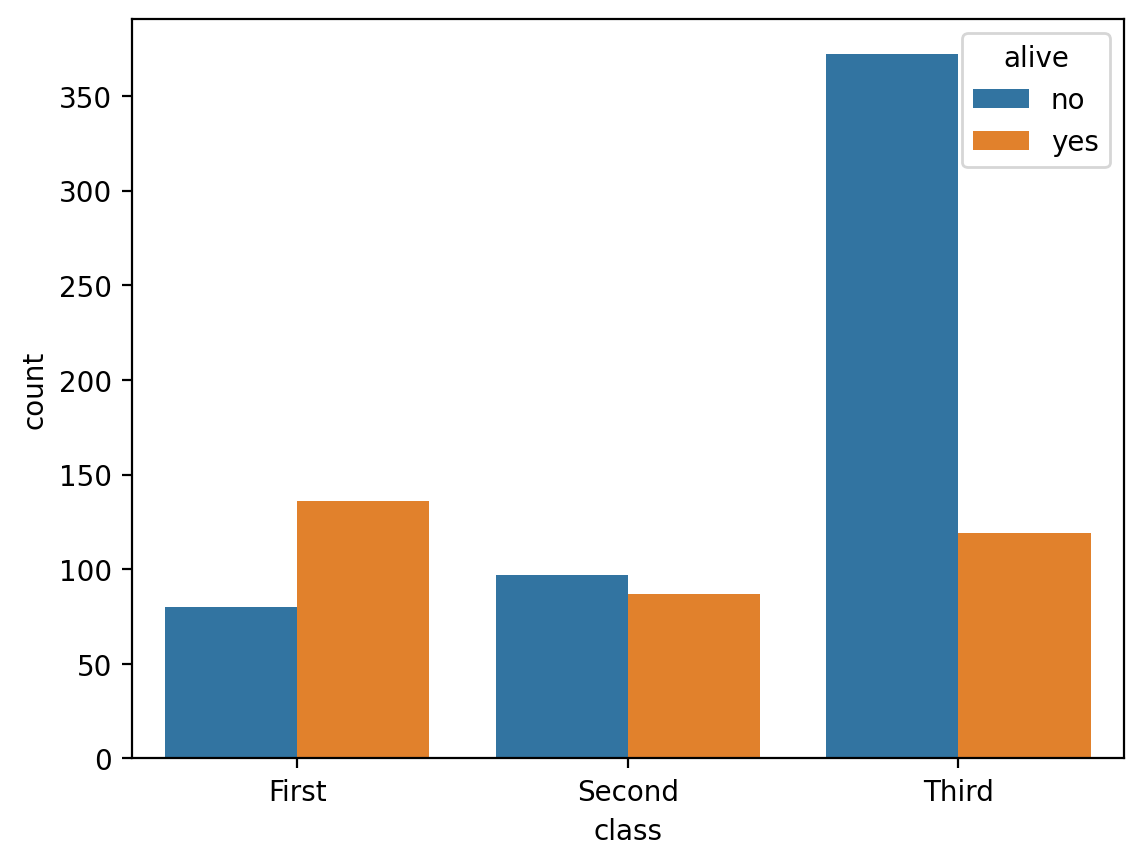

In [ ]:
# 각 객실 등급 내에서 생존자와 사망자의 분포 시각화
sns.countplot(data = titanic, x = 'class', hue = 'alive');  # x축 class, alive별 색 표현

In [ ]:
#Titanic 데이터프레임을 'class' 열을 기준으로 그룹화하고, 각 그룹에 대해 각 열의 값의 개수를 계산
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


In [ ]:
#itanic 데이터프레임의 각 열에서 고유한(unique) 값의 개수
titanic.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

##3. 객실 등급 (pclass)

In [ ]:
# Titanic 데이터프레임에서 'pclass' 열의 값을 NumPy 배열로 반환
titanic.pclass.values

array([3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2,
       3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3,
       1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3,
       3, 1, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2,
       3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1,
       3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3,

In [ ]:
#Titanic 데이터프레임의 'pclass' 열에서 고유한(unique) 값들을 반환
titanic["pclass"].unique()

array([3, 1, 2])

In [ ]:
#Titanic 데이터프레임에서 'pclass' 열의 고유한(unique) 값들을 반환
titanic.pclass.unique()

array([3, 1, 2])

In [ ]:
#Titanic 데이터프레임에서 'pclass' 열을 선택
titanic["pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [ ]:
#Titanic 데이터프레임에서 'pclass' 열을 선택
titanic.pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [ ]:
#Titanic 데이터프레임의 'pclass' 열에서 각 값의 빈도수를 계산하고, 그 결과를 인덱스를 기준으로 정렬하여 반환
titanic.pclass.value_counts().sort_index()

pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [ ]:
#Titanic 데이터프레임에서 'pclass' 열을 선택하여 DataFrame으로 반환
titanic[["pclass"]]

,pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [ ]:
#Titanic 데이터프레임의 'pclass' 열에서 각 값의 빈도수를 계산하여 반환
titanic.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
#Titanic 데이터프레임의 'pclass' 열에서 고유한(unique) 값의 개수를 반환
titanic.pclass.nunique()

3

In [ ]:
#Titanic 데이터프레임에서 'pclass'와 'who' 열을 선택하여 해당 값들을 NumPy 배열로 반환
titanic[['pclass', 'who']].values

array([[3, 'man'],
       [1, 'woman'],
       [3, 'woman'],
       ...,
       [3, 'woman'],
       [1, 'man'],
       [3, 'man']], dtype=object)

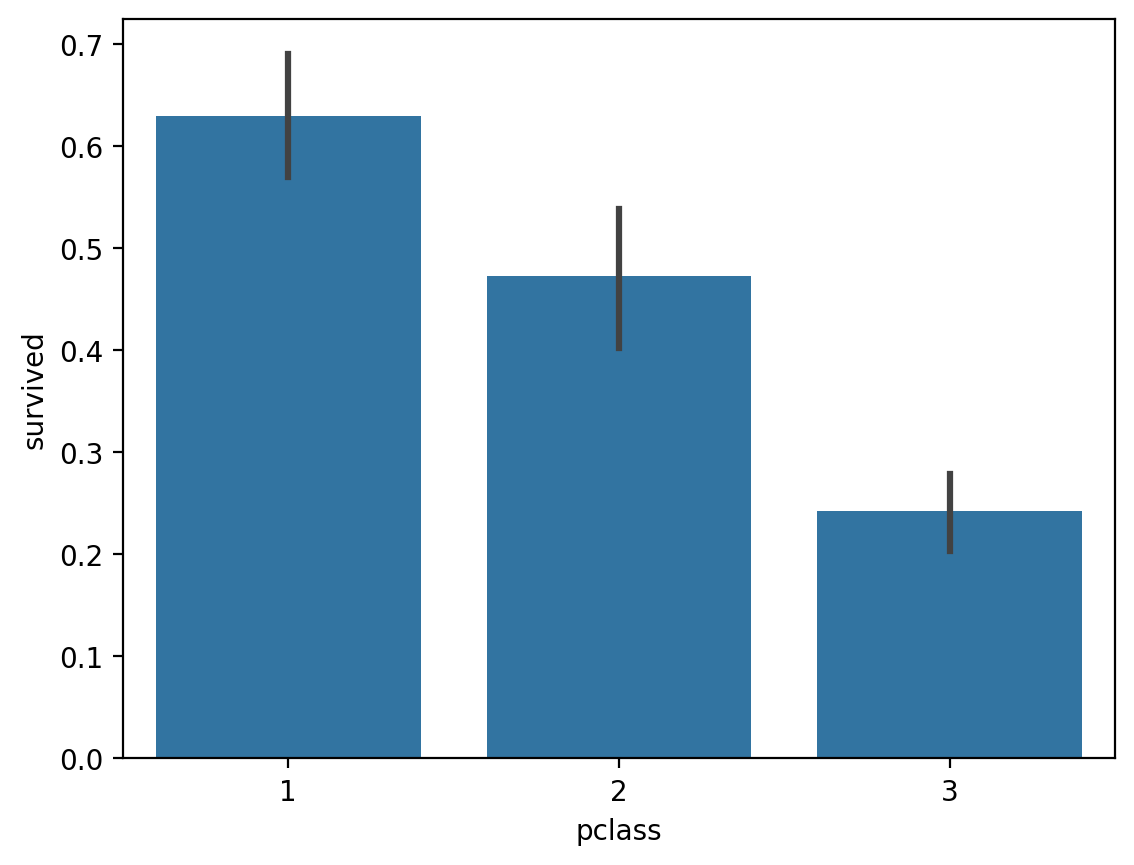

In [ ]:
#seaborn 라이브러리를 사용하여 Titanic 데이터셋에서 객실 등급별 생존율을 막대 그래프로 시각화
sns.barplot(x="pclass", y="survived", data=titanic);

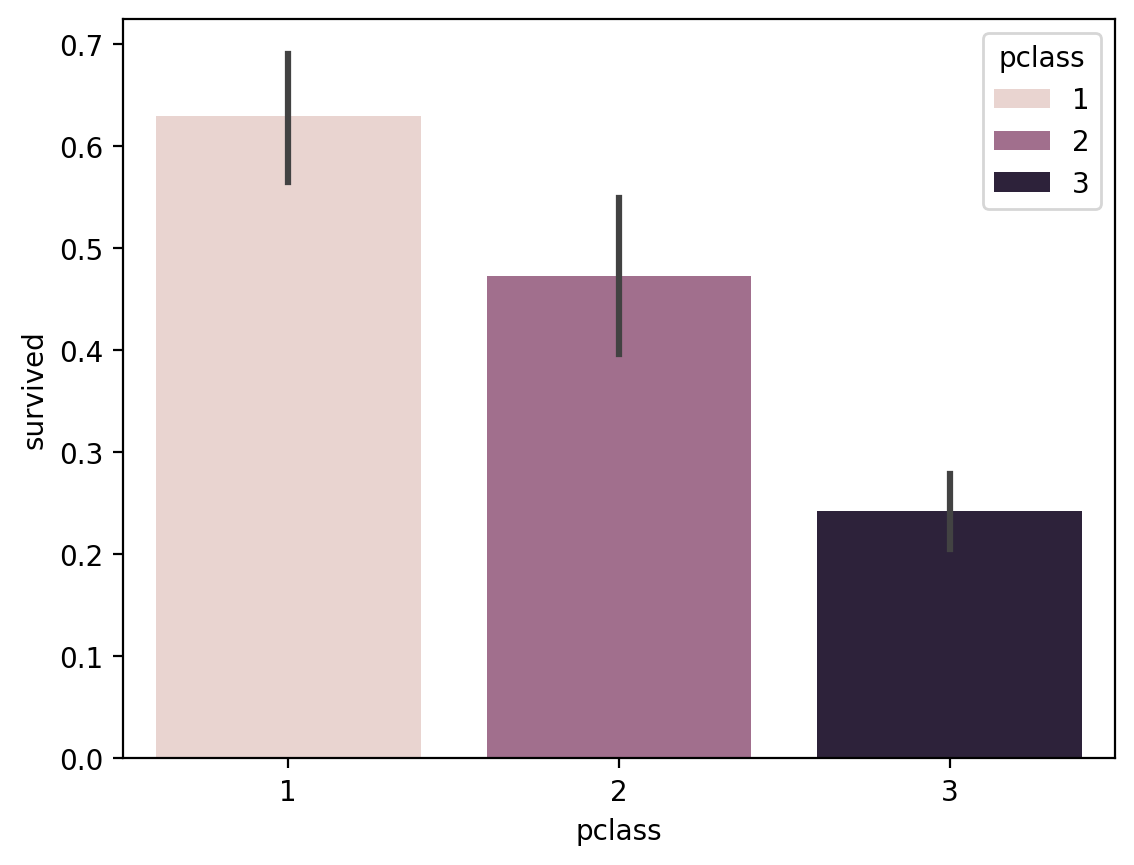

In [ ]:
# eaborn 라이브러리를 사용하여 Titanic 데이터프레임에서 객실 등급별 생존율을 막대 그래프로 시각화
sns.barplot(titanic, x="pclass", y="survived", hue="pclass");

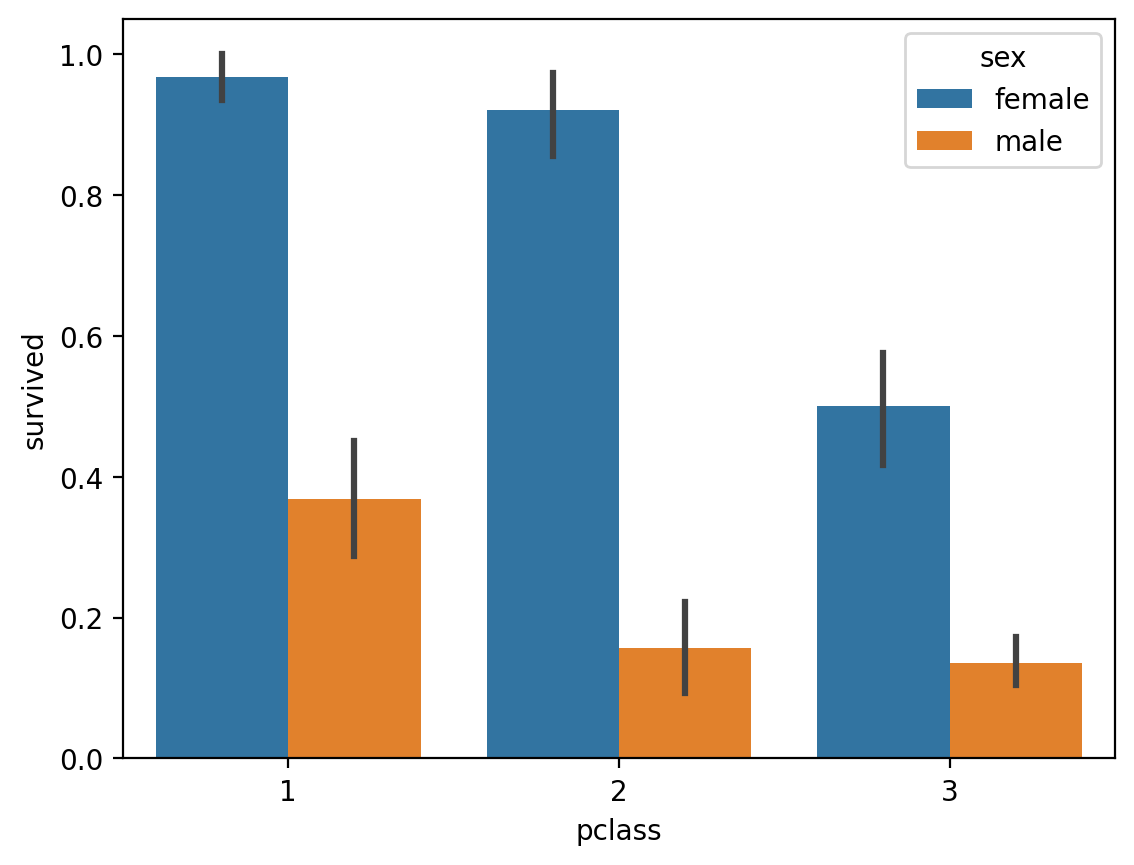

In [ ]:
# Seaborn 라이브러리를 사용하여 타이타닉 데이터셋에서 객실 등급(pclass)와 성별(sex)에 따른 생존율(survived)의 평균을 시각화
sns.barplot(x="pclass", y="survived", hue="sex", data=titanic);

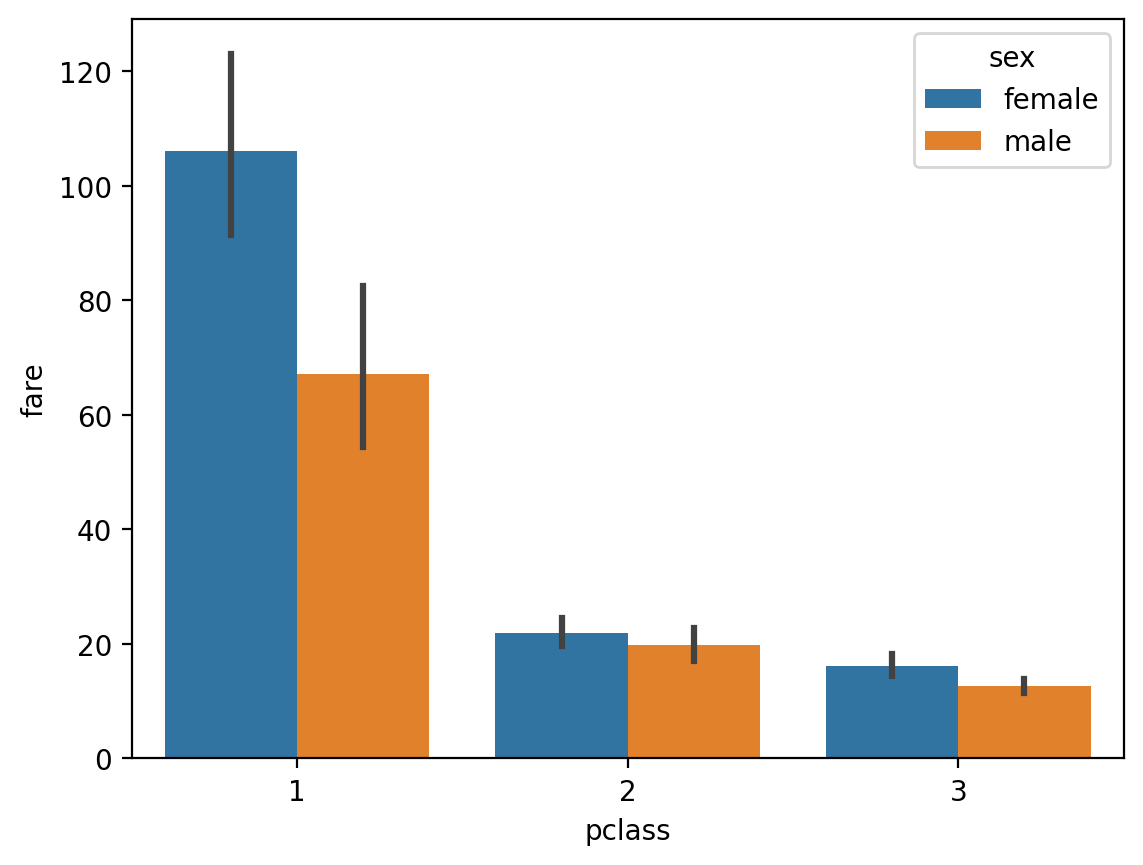

In [ ]:
# Seaborn 라이브러리를 사용하여 타이타닉 데이터셋에서 승객 클래스(pclass)와 성별(sex)에 따른 운임 요금(fare)의 평균을 시각화
sns.barplot(titanic, x="pclass", y="fare", hue="sex");

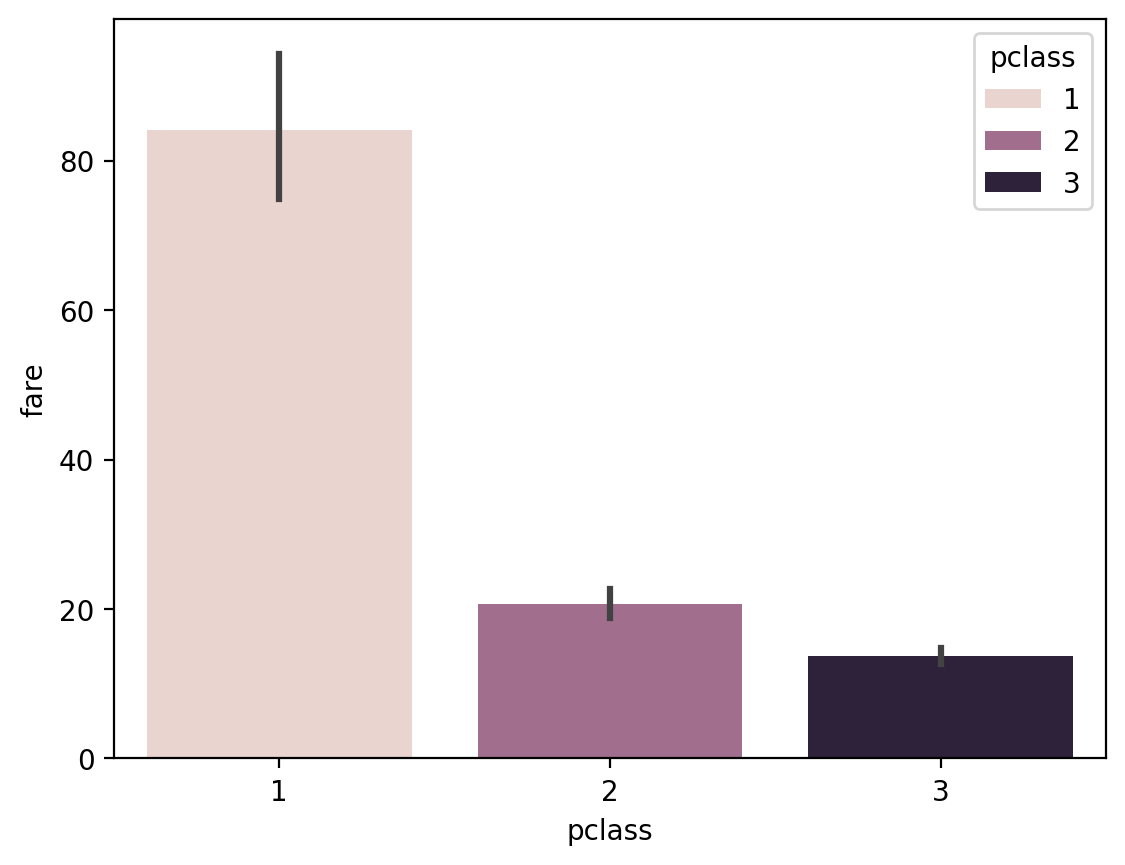

In [ ]:
# seaborn 라이브러리를 사용하여 Titanic 데이터프레임에서 각 객실 등급(pclass)별 요금(fare)의 평균을 시각화
sns.barplot(titanic, x="pclass", y="fare", hue="pclass");

##4. 함께 탑승한 가족의 수 (SibSp, Parch)



<Axes: xlabel='family_size', ylabel='count'>

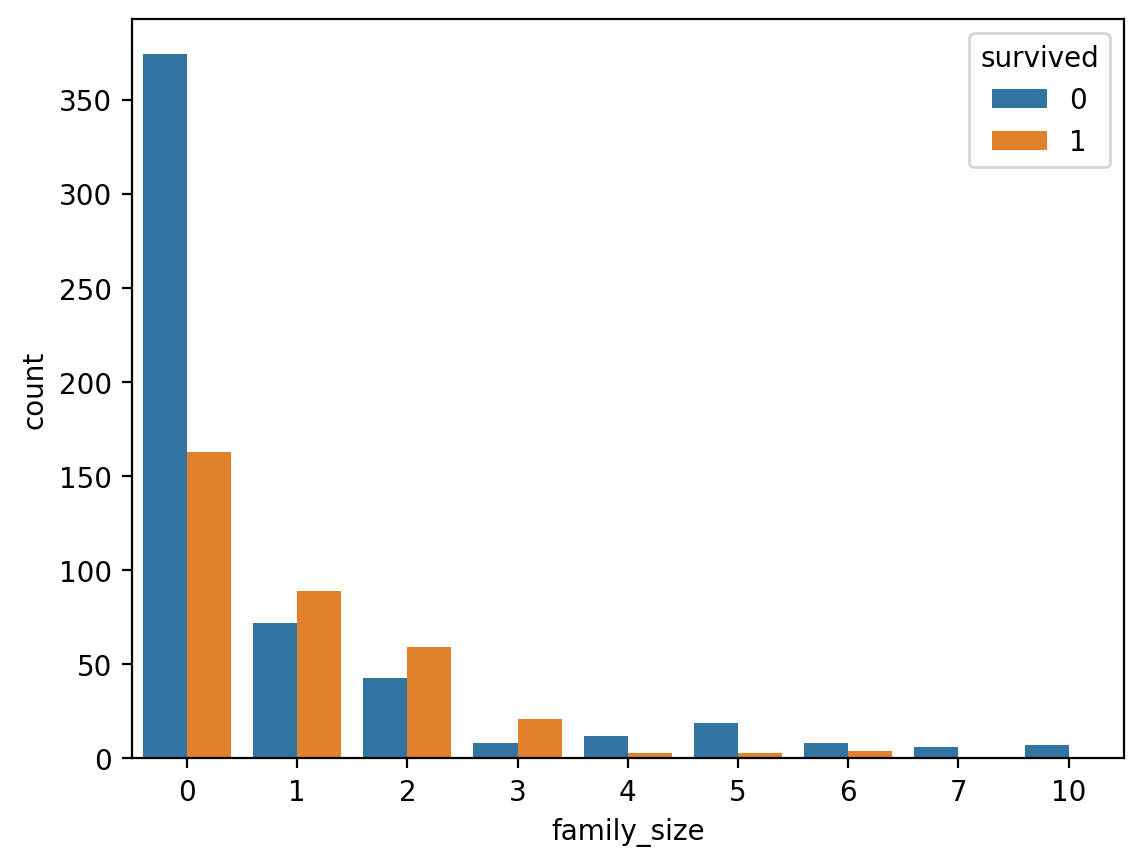

In [ ]:
# 함께 탑승한 가족의 수 계산
titanic['family_size'] = titanic['sibsp'] + titanic['parch']

# 가족 수에 따른 생존 여부 시각화
sns.countplot(x='family_size', hue='survived', data=titanic)

##5. 탑승 항구 (Embarked)

<Axes: xlabel='embarked', ylabel='count'>

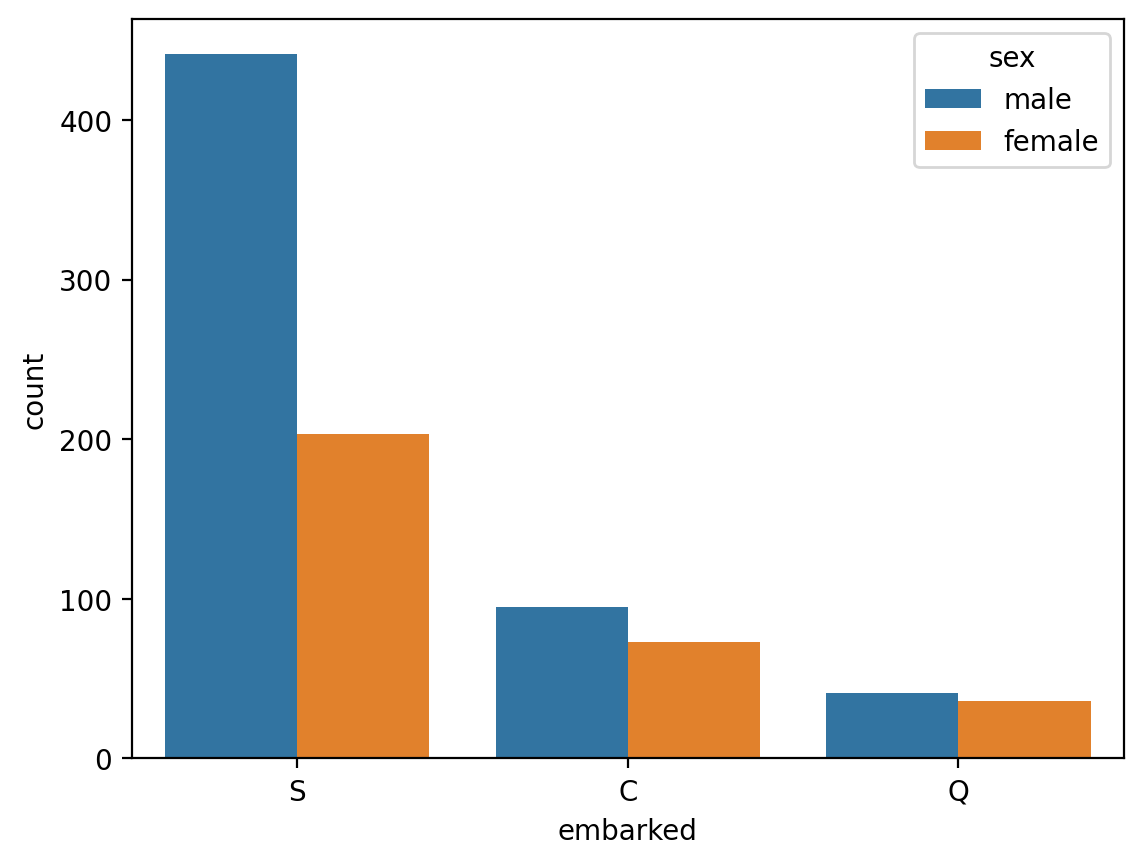

In [ ]:
# 성별 탑승자 수
sns.countplot(x='embarked', hue='sex', data=titanic)

<Axes: xlabel='embarked', ylabel='count'>

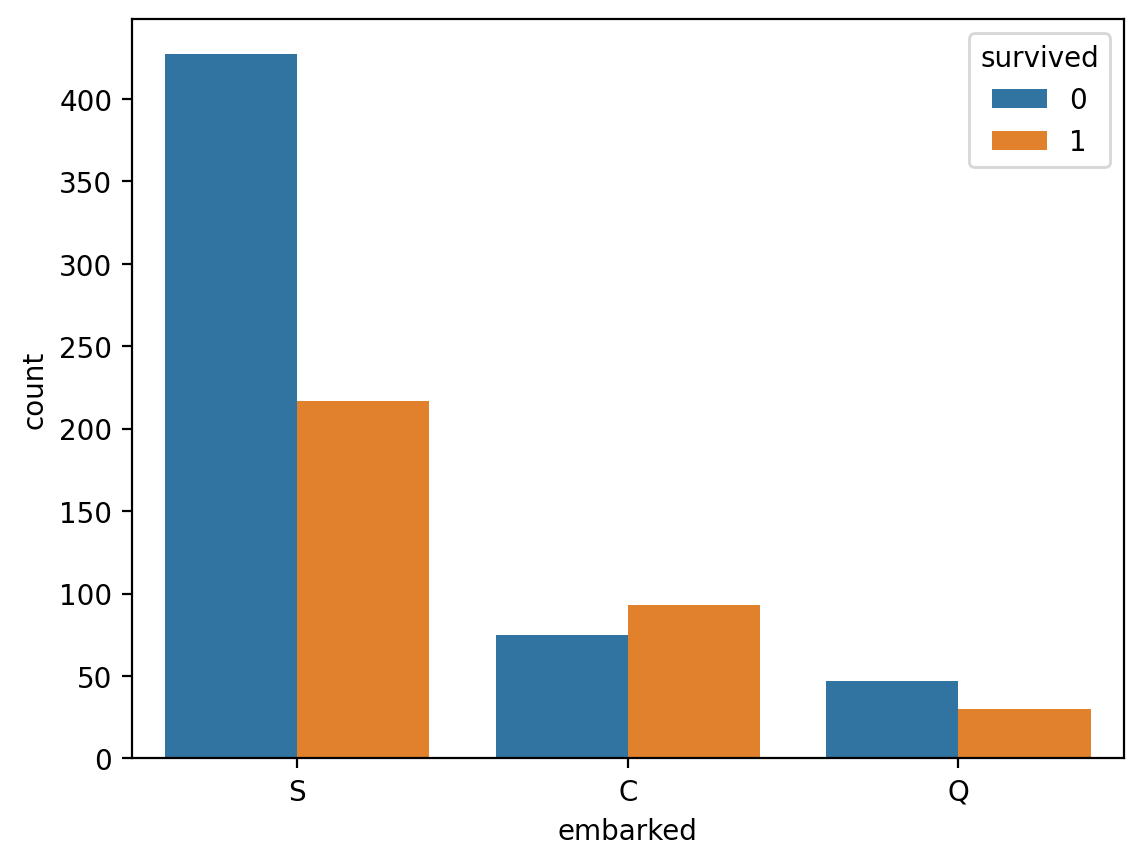

In [ ]:
# 탑승 항구별 생존자 수
sns.countplot(x='embarked', hue='survived', data=titanic)

## 6. 탑승 금액 (Fare)

<Axes: xlabel='survived', ylabel='fare'>

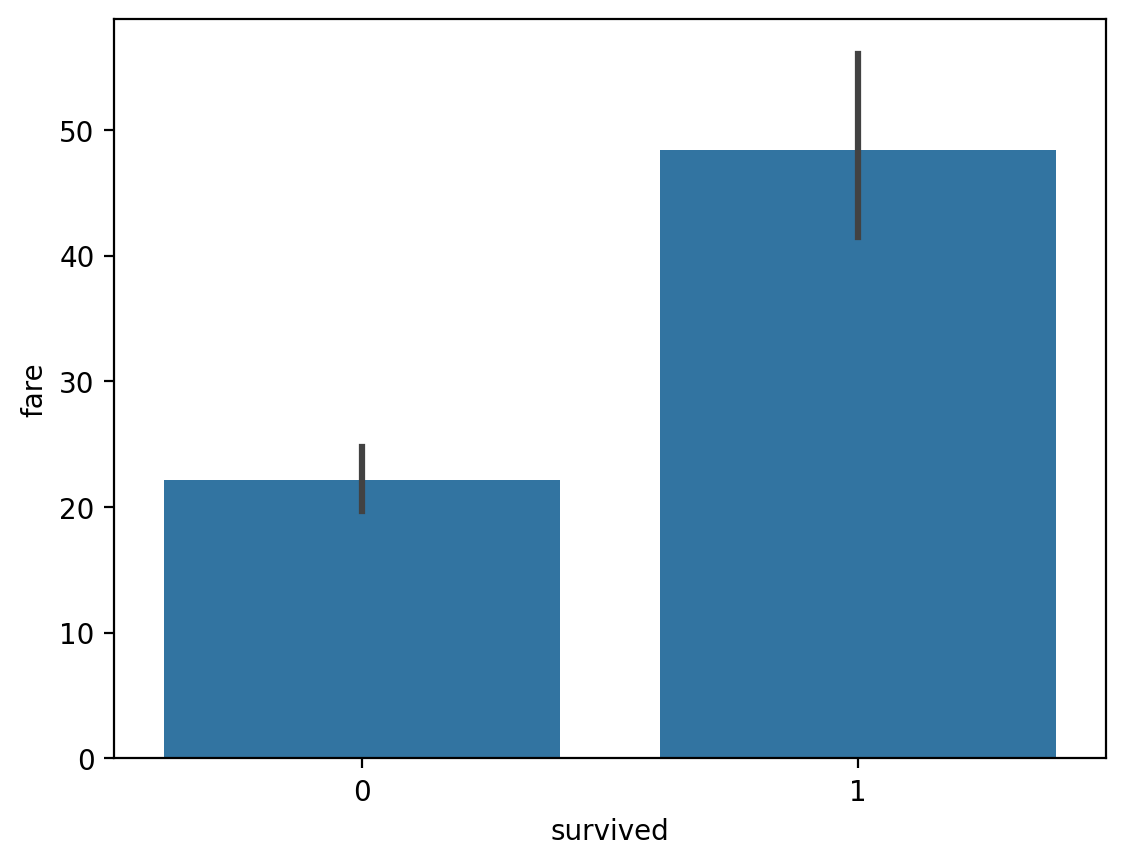

In [ ]:
# 탑승 금액에 따른 생존 여부 시각화
sns.barplot(x='survived', y='fare', data=titanic)

In [ ]:
#타이타닉 데이터셋의 수치형 변수에 대한 요약 통계를 확인
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 7. 방위치(deck)

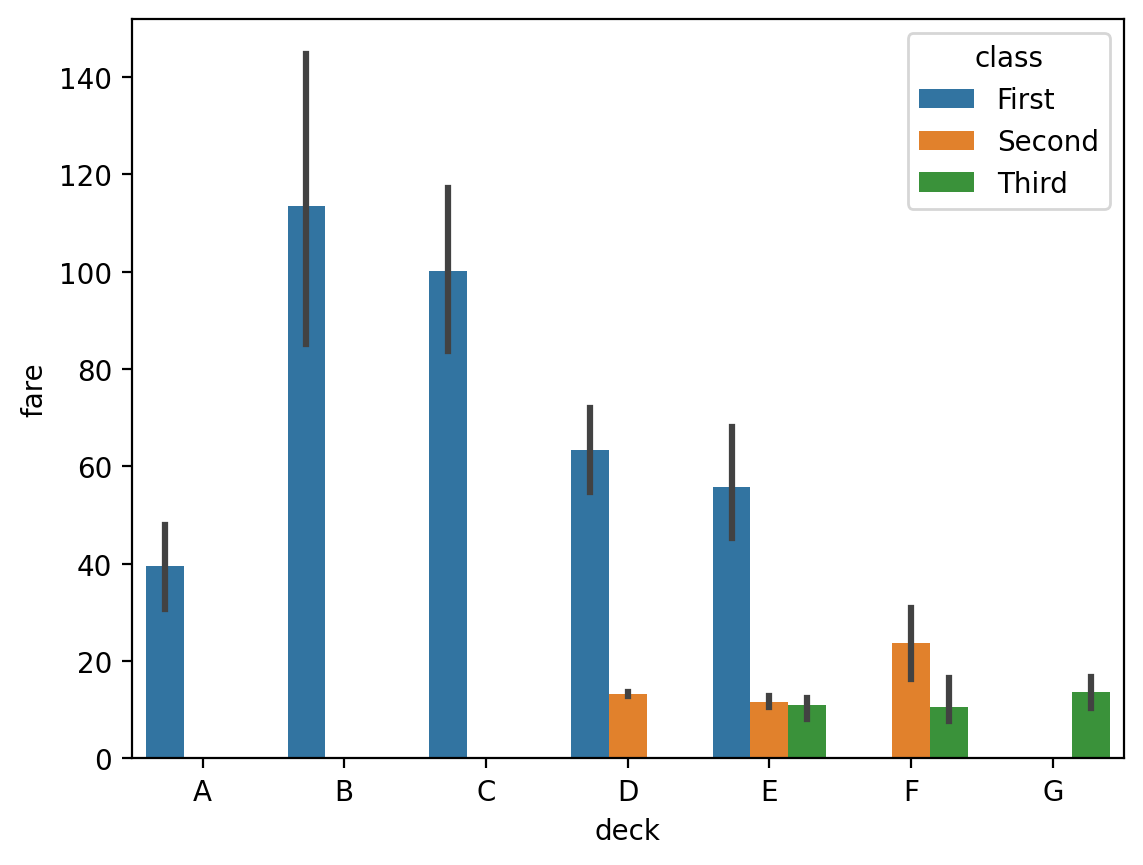

In [ ]:
# 타이타닉 데이터셋에서 방 위치(deck)별 평균 요금을 객실 등급(class)에 따라 시각화
sns.barplot(titanic, x="deck", y="fare", hue='class');

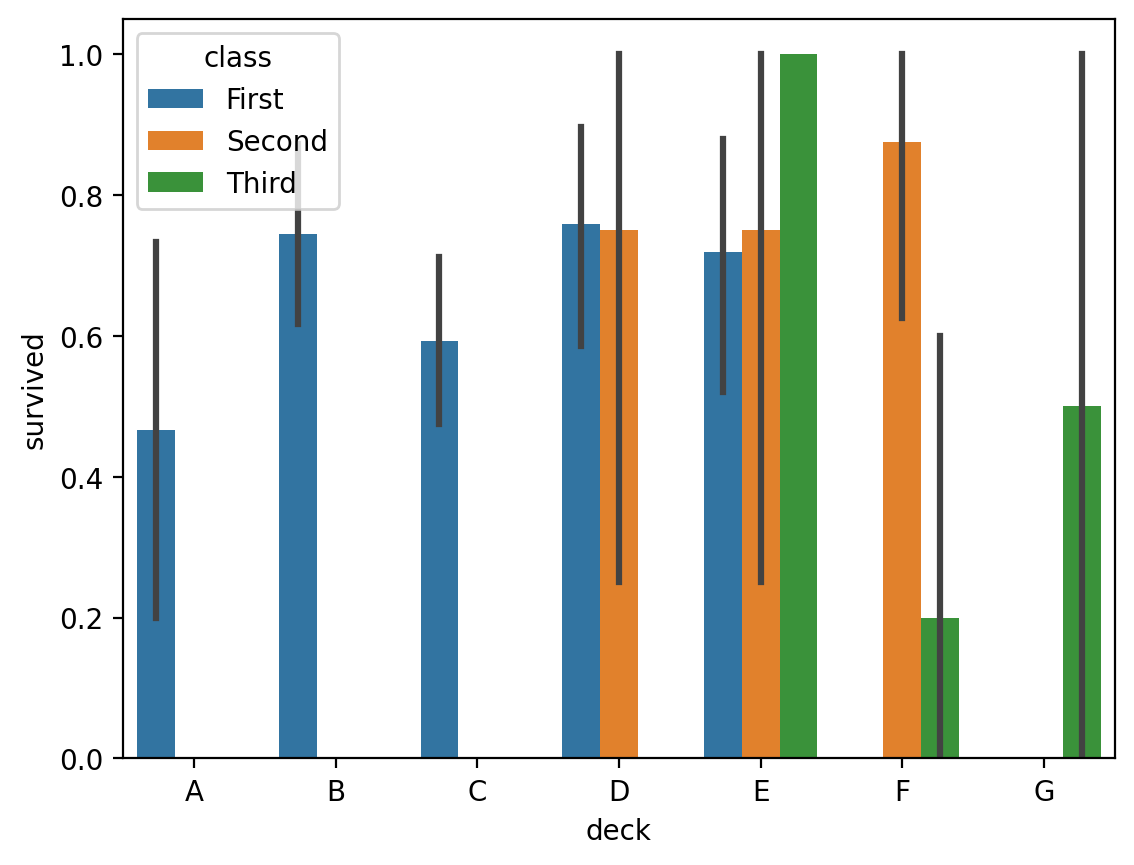

In [ ]:
# 각 방 위치(deck)과 객실 등급(class)에 따른 생존율을 시각화
sns.barplot(titanic, x="deck", y="survived", hue='class');

In [ ]:
#Titanic 데이터프레임을 'pclass' 열을 기준으로 그룹화하고, 각 그룹의 'fare' 열의 값을 계산
titanic.groupby("pclass")["fare"]

In [ ]:
#Titanic 데이터프레임을 'pclass' 열을 기준으로 그룹화하고, 각 그룹의 'fare' 열의 평균을 계산
titanic.groupby("pclass")["fare"].mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

##결과 분석
성별에 따른 생존율: 여성의 생존율이 남성보다 높음.<br>
객실 등급에 따른 생존율: 1등급 승객의 생존율이 가장 높고, 3등급 승객의 생존율이 가장 낮음.<br>
나이에 따른 생존율: 어린이와 청년층의 생존율이 높음.<br>
승선 항구에 따른 생존율: 특정 항구에서 승선한 승객의 생존율이 다름.<br>
함께 탑승한 가족 수에 따른 생존율:혼자 탑승한 경우보다 가족과 함께 탑승한 경우 생존 확률이 높음. <br>
탑승 금액에 따른 생존율: 높은 탑승 금액을 지불한 승객들이 생존율이 높음.<br>
탑승 항구에 따른 생존율 : 각 항구의 지리적 위치나 승객들의 배정된 객실 위치와 관련된 요인들이 생존 여부에 영향을 줄 수 있음.<br>
방위치에 따른 생존율: 객실이 위치한 데크가 생존 여부에 영향을 줄 수 있으며, 해당 정보는 생존 여부와의 상관 관계를 분석하는 데 도움이 될 수 있음.<br>






##결론
성별, 객실 등급, 나이, 승선 항구 등 타이타닉 생존율에 중요한 영향을 미침. 이를 통해 유사한 상황에서의 대비책을 찾을 수 있음.
